# 04 분류하는 뉴런을 만듭니다

## 04-4 분류용 데이터 세트를 준비합니다 

<사이킷런 위스콘신 유방암 데이터 세트>
> 양성 종양 : 음성 샘플 (0) <br> 악성 종양 : 양성 샘플 (1)


**유방암 데이터 세트 준비하기** 

1) load_breast_cancer() 함수 호출하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

2) 입력 데이터 확인하기 

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [5]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

3) 박스 플롯으로 특성의 사분위 관찰하기 <br>
> 박스플롯은 1사분위와 3사분위 값으로 상자를 그린 다음 그 안에 2사분위(중간값) 값을 표시한다. 그런 다음 1사분위와 3사분위 사이 거리의 1.5배만큼 위아래 거리에서 가장 큰 값과 가장 작은 값까지 수염을 그린다 

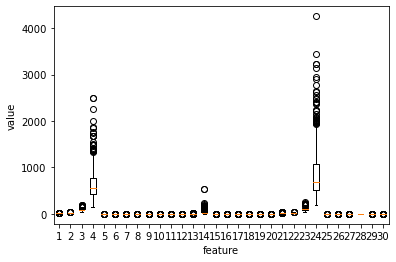

In [6]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

4) 눈에 띄는 특성 살펴보기 <br>
> 박스 플롯을 보면 4, 14, 24 번째 특성이 다른 특성보다 값의 분포가 훨씬 크다. 모두 넓이와 관련된 특성이다.

In [7]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

5) 타깃 데이터 확인하기 

In [8]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

위의 타깃 데이터에는 212개의 음성 클래스와 357개의 양성 클래스(악성종양)가 들어 있다.

6. 훈련 데이터 세트 저장하기 

In [9]:
x = cancer.data
y = cancer.target

*** 
<br>

## 04-5 로지스틱 회귀를 위한 뉴런을 만듭니다

**모델의 성능 평가를 위한 훈련 세트와 테스트 세트** <br>
훈련 데이터 세트를 두 덩어리로 나누어 하나는 훈련에, 다른 하나는 테스트에 사용한다. 
> **<훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙>** <br> - 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야 한다. <br> - 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 한다.

**훈련 세트와 테스트 세트로 나누기** <br>
양성 클래스와 음성 클래스의 비율을 일정하게 유지하면서 훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누기

1) train_test_split() 함수로 훈련 데이터 세트 나누기 <br>
- 훈련 75%, 테스트 25% 비율로 나눠줌

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

>  1. stratify=y : 훈련 데이터를 나눌때 클래스 비율을 동일하게 만든다. train_test_split() 함수는 기본적으로 데이터를 나누기 전에 섞지만 일부 클래스 비율이 불균형한 경우에는 stratify를 y로 지정해야 한다. <br><br>  2. test_size=0.2 : test_size 매개변수에 테스트 세트의 비율을 전달하면 비율을 조절할 수 있다. 여기에서는 입력된 데이터 세트의 20%를 테스트 세트로 나누기 위해 test_size에 0.2를 전달했다. <br><br> 3. random_state=42 : train_test_split() 함수는 무작위로 데이터 세트를 섞은 다음 나눈다. 이 책에서는 섞은 다음 나눈 결과가 항상 일정하도록 random_state 매개변수에 난수 초깃값 42를 지정했다. (실전에서는 사용할 필요가 없다.)

2) 결과 확인하기 <br> 
- 훈련 : 테스트 비율이 4:1 (455, 114) 로 잘 나누어졌음

In [12]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


3) unique() 함수로 훈련 세트의 타깃 확인하기 <br>
- 타깃 안에 있는 클래스의 개수를 확인 -> 전체 훈련 데이터 세트의 클래스 비율과 거의 비슷한 것 확인 (양성클래스가 1.7배 정도 많음)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

**로지스틱 회귀 구현하기**

cf) 넘파이 함수들 

In [16]:
a = np.array([1,2,3])
b = np.array([3,4,5])

In [17]:
a + b

array([4, 6, 8])

In [18]:
a * b

array([ 3,  8, 15])

In [19]:
np.sum(a * b)

26

In [20]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [21]:
np.full((2, 3), 7)

array([[7, 7, 7],
       [7, 7, 7]])

In [22]:
np.c_[np.zeros((2, 3)), np.ones((2, 3))]

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

**LogisticNeuron 클래스**

In [28]:
class LogisticNeuron:
    
    def __init__(self):  # 특성이 많아 가중치를 미리 초기화하지 않았다.
                         # 가중치는 나중에 입력 데이터를 보고 특성 개수에 맞게 결정
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
                                         # 가중치와 입력 특성의 곱을 모두 더함
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad
    
    # 활성화 함수 activation() 메서드 : 시그모이드 함수가 사용되어야 함
    # np.exp() 함수를 사용
    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
    
    # 훈련을 수행하는 fit()메서드 구현
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        self.b = 0                        # 절편을 초기화합니다.
        for i in range(epochs):           # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)    # 활성화 함수 적용
                err = -(y_i - a)          # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트
    
    # 예측하는 predict() 메서드 
    # 여러개의 샘플을 한꺼번에 예측하려면 forpass() 메서드를 여러번 호출하게 되는데, 번거로움
    # 분류에서는 활성화 함수와 임계 함수도 적용해야 하므로 새로운 샘플에 대한 예측값을 계산해주는 메서드를 만듦
    def predict(self, x):
        # 예측값은 입력값을 선형 함수, 활성화 함수, 임계 함수 순서로 통과시키면 구할 수 있다.
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a > 0.5

**로지스틱 회귀 모델 훈련시키기**

1) 모델 훈련하기 

In [29]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

2) 테스트 세트 사용해 모델의 정확도 평가하기 

In [30]:
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

계산 결과 0.82.... 는 올바르게 예측한 샘플의 비율이다. 이를 정확도(accuracy)라고 한다. 